In [125]:
# !pip install --upgrade pip
# !pip install mysql
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import scipy as sp
import scipy.fftpack

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:.8f}'.format)


In [126]:
config = {
  'host':'elecsimresults2.mysql.database.azure.com',
  'user':'alexkell@elecsimresults2',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'elecsimbeisresults',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

conn = mysql.connector.connect(**config)

In [127]:
ga_results = pd.read_sql('SELECT * FROM validoptimresults1', con=conn)
ga_results.to_csv("")
ga_results

id  run_number     time_taken     timestamp_start       timestamp_end  \
0      1           1  6889.77597956 1571294676.44862819 1571301566.22460723   
1      2           1     0.00000000          0.00000000          0.00000000   
2      3           1     0.00000000          0.00000000          0.00000000   
3      4           1     0.00000000          0.00000000          0.00000000   
4      5           1     0.00000000          0.00000000          0.00000000   
5      6           1     0.00000000          0.00000000          0.00000000   
6      7           1     0.00000000          0.00000000          0.00000000   
7      8           1     0.00000000          0.00000000          0.00000000   
8      9           1     0.00000000          0.00000000          0.00000000   
9     10           1     0.00000000          0.00000000          0.00000000   
10    11           1     0.00000000          0.00000000          0.00000000   
11    12           1     0.00000000          0.00000000          0.00000000   
12    13           1     0.00000000          0.00000000          0.00000000   
13    14           1     0.00000000          0.00000000          0.00000000   
14    15           1     0.00000000          0.00000000          0.00000000   
15    16           1     0.00000000          0.00000000          0.00000000   
16    17           1     0.00000000          0.00000000          0.00000000   
17    18           1     0.00000000          0.00000000          0.00000000   
18    19           1     0.00000000          0.00000000          0.00000000   
19    20           1     0.00000000          0.00000000          0.00000000   
20    21           1 36107.88006963 1571294675.74081588 1571330783.62088513   
21    22           1     0.00000000          0.00000000          0.00000000   
22    23           1     0.00000000          0.00000000          0.00000000   
23    24           1     0.00000000          0.00000000          0.00000000   
24    25           1     0.00000000          0.00000000          0.00000000   
25    26           1     0.00000000          0.00000000          0.00000000   
26    27           1     0.00000000          0.00000000          0.00000000   
27    28           1     0.00000000          0.00000000          0.00000000   
28    29           1     0.00000000          0.00000000          0.00000000   
29    30           1     0.00000000          0.00000000          0.00000000   
30    31           1     0.00000000          0.00000000          0.00000000   
31    32           1     0.00000000          0.00000000          0.00000000   
32    33           1     0.00000000          0.00000000          0.00000000   
33    34           1     0.00000000          0.00000000          0.00000000   
34    35           1     0.00000000          0.00000000          0.00000000   
35    36           1     0.00000000          0.00000000          0.00000000   
36    37           1     0.00000000          0.00000000          0.00000000   
37    38           1     0.00000000          0.00000000          0.00000000   
38    39           1     0.00000000          0.00000000          0.00000000   
39    40           1     0.00000000          0.00000000          0.00000000   
40    41           1     0.00000000          0.00000000          0.00000000   
41    42           1     0.00000000          0.00000000          0.00000000   
42    43           1     0.00000000          0.00000000          0.00000000   
43    44           1     0.00000000          0.00000000          0.00000000   
44    45           1     0.00000000          0.00000000          0.00000000   
45    46           1     0.00000000          0.00000000          0.00000000   
46    47           1 26997.94120385 1571294676.84062243 1571321674.78182650   
47    48           1     0.00000000          0.00000000          0.00000000   
48    49           1     0.00000000          0.00000000          0.00000000   
49    50           1 18257.83868062 1571294676.67850208 

In [128]:
ga_results.sort_values(by='reward')

id  run_number     time_taken     timestamp_start       timestamp_end  \
229  230           2 50715.01138983 1571392518.02709913 1571443233.03848791   
46    47           1 26997.94120385 1571294676.84062243 1571321674.78182650   
114  115           1 32493.42790743 1571317957.92498422 1571350451.35291266   
263  264           3 80086.01106698 1571469268.64859629 1571549354.65966344   
173  174           2 68974.27395174 1571353100.32341266 1571422074.59736466   
20    21           1 36107.88006963 1571294675.74081588 1571330783.62088513   
255  256           3 76197.46745404 1571469272.65416431 1571545470.12161875   
220  221           2 21467.25539036 1571386756.07237959 1571408223.32777047   
146  147           2 41900.62126356 1571353094.84637976 1571394995.46764445   
133  134           2 44639.83850450 1571353094.09060907 1571397733.92911410   
193  194           2 42768.61949068 1571366327.18311119 1571409095.80260158   
97    98           1 31353.28813183 1571313147.49051094 1571344500.77864194   
153  154           2 42069.87624443 1571353093.54570293 1571395163.42194772   
139  140           2 58431.38186710 1571353095.23878646 1571411526.62065315   
80    81           1 26506.03623048 1571306287.71197701 1571332793.74820733   
294  295           3 32732.13324374 1571469269.77537870 1571502001.90862274   
75    76           1 36569.24253739 1571305081.54277730 1571341650.78531361   
212  213           2 62729.59273311 1571381766.65243912 1571444496.24517155   
314  315           3 63224.17770334 1571469264.23071241 1571532488.40841603   
404  405           4 86738.62202714 1571635038.44148278 1571721777.06350970   
245  246           2 27650.50620028 1571402174.20093417 1571429824.70713377   
71    72           1 32165.13072975 1571303275.84294128 1571335440.97367024   
49    50           1 18257.83868062 1571294676.67850208 1571312934.51718354   
127  128           2 48183.78087005 1571353096.15725231 1571401279.93812275   
198  199           2 50313.34967560 1571370822.43992066 1571421135.78959537   
210  211           2 46079.20949586 1571380665.90552759 1571426745.11502290   
472  473           4 67108.18922648 1571707509.16294456 1571774617.35217047   
334  335           3 40814.10451027 1571506468.35279226 1571547282.45730257   
290  291           3 75154.64136692 1571469266.04584765 1571544420.68721485   
242  243           2 48735.97723017 1571401257.41707420 1571449993.39430380   
180  181           2 32788.63537628 1571353103.35626864 1571385891.99164581   
148  149           2 68920.77969943 1571353106.10741663 1571422026.88711596   
181  182           2 19721.25226660 1571353099.09960938 1571372820.35187602   
159  160           2 76778.54166355 1571353101.65339637 1571429880.19505978   
228  229           2 28756.16645562 1571392261.36444569 1571421017.53090119   
455  456           4 83596.64937637 1571679179.95989680 1571762776.60927320   
434  435           4 89134.56049873 1571635045.92186379 1571724180.48236322   
192  193           2 24354.36721343 1571365305.13588238 1571389659.50309658   
0      1           1  6889.77597956 1571294676.44862819 1571301566.22460723   
324  325           3 27694.24950881 1571494414.22670794 1571522108.47621679   
400  401           4 43342.84590732 1571635047.33704638 1571678390.18295407   
443  444           4 46219.51788651 1571635049.29356599 1571681268.81145287   
440  441           4 99538.93432756 1571635053.98221040 1571734592.91653800   
284  285           3 25129.32689053 1571469262.20764446 1571494391.53453493   
329  330           3 45201.54933323 1571502039.07831430 1571547240.62764740   
431  432           4 38533.93545241 1571635046.74481130 1571673580.68026352   
283  284           3 37157.57467432 1571469272.35708308 1571506429.93175793   
383  384           4 29945.39995302 1571635046.99727988 1571664992.39723349   
336  337           3     0.00000000          0.00000000          0.00000000   
490  491           4     0.00000000          0.00000000 

In [133]:
ga_results.sort_values(by='reward').iloc[0].tolist()

[230.0,
 2.0,
 50715.01138982701,
 1571392518.0270991,
 1571443233.038488,
 6.229607240645677,
 0.00121256259168,
 46.85037739256387,
 0.0029982421515,
 28.9229765616468,
 0.00106156336814,
 18.37033767006376,
 0.00228312539654,
 40.74731543938266,
 0.00240464711411,
 34.43480109190594,
 0.00284186482574,
 -20.88014916953091,
 0.00016104706555,
 8.15032953348701,
 0.00200271495761,
 -12.5461853755818,
 0.00155518243668,
 39.7911329705228,
 0.00027449937576,
 8.42878689508516,
 0.00111989525697,
 19.81640207212787,
 0.00224091998324,
 5.26288570922149,
 0.00209189353332,
 -5.91173171312952,
 0.00240696026847,
 -5.0144941135222,
 0.00021183142493,
 -1.29658413335784,
 0.00039441444392,
 -11.41659250225168,
 0.00219888388243,
 12.6335729432946,
 120.21276910611674,
 0.0005481249937,
 0.00059945111227,
 -1000.0,
 -1000.0,
 -1000.0,
 -1000.0,
 -1000.0]

In [129]:
ga_results_small = ga_results[ga_results.reward<100000]
# sns.distplot(ga_results_small.reward, hue="run_number")

In [130]:
ga_results_small.groupby("run_number").count()

id  time_taken  timestamp_start  timestamp_end  reward  \
run_number                                                           
1            9           9                9              9       9   
2           20          20               20             20      20   
3           10          10               10             10      10   
4            9           9                9              9       9   

            individual_m_1  individual_c_1  individual_m_2  individual_c_2  \
run_number                                                                   
1                        9               9               9               9   
2                       20              20              20              20   
3                       10              10              10              10   
4                        9               9               9               9   

            individual_m_3  individual_c_3  individual_m_4  individual_c_4  \
run_number                                                                   
1                        9               9               9               9   
2                       20              20              20              20   
3                       10              10              10              10   
4                        9               9               9               9   

            individual_m_5  individual_c_5  individual_m_6  individual_c_6  \
run_number                                                                   
1                        9               9               9               9   
2                       20              20              20              20   
3                       10              10              10              10   
4                        9               9               9               9   

            individual_m_7  individual_c_7  individual_m_8  individual_c_8  \
run_number                                                                   
1                        9               9               9               9   
2                       20              20              20              20   
3                       10              10              10              10   
4                        9               9               9               9   

            individual_m_9  individual_c_9  individual_m_10  individual_c_10  \
run_number                                                                     
1                        9               9                9                9   
2                       20              20               20               20   
3                       10              10               10               10   
4                        9               9                9                9   

            individual_m_11  individual_c_11  individual_m_12  \
run_number                                                      
1                         9                9                9   
2                        20               20               20   
3                        10               10               10   
4                         9                9                9   

            individual_c_12  individual_m_13  individual_c_13  \
run_number                                                      
1                         9                9                9   
2                        20               20               20   
3                        10               10               10   
4                         9                9                9   

            individual_m_14  individual_c_14  individual_m_15  \
run_number                                                      
1                         9                9                9   
2                        20               20               20   
3                        10               10               10   
4                         9                9                9   

            individual_c_15  individual_m_16  individual_c_16

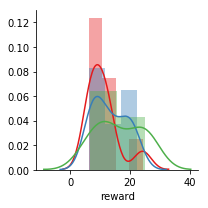

In [43]:
g = sns.FacetGrid(ga_results_small, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "reward"))
# g.set(xlim=(0, 25), ylim=(0,0.00000005))

In [44]:
ga_results_modified = ga_results.copy()
ga_results_modified = ga_results_modified.replace(99999999, 40)
# ga_results_modified

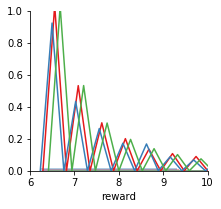

In [45]:
g = sns.FacetGrid(ga_results_modified, hue="run_number", palette="Set1")
g = (g.map(sns.distplot, "reward"))
g.set(ylim=(0, 1), xlim=(6,10))


In [46]:
best_result = pd.DataFrame(ga_results.sort_values(by='reward').iloc[0])
best_result = best_result.reset_index()
best_result['ind'] = "1"
# best_result[['parameter', 'type', 'number']] = best_result['index'].str.split("_")

In [47]:
best_result_long = best_result.pivot(index='ind', columns='index', values=229).melt(['reward','run_number','time_taken','timestamp_end', 'timestamp_start'])
best_result_long

reward  run_number     time_taken       timestamp_end  \
0  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
1  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
2  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
3  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
4  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
5  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
6  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
7  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
8  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
9  6.22960724  2.00000000 50715.01138983 1571443233.03848791   
10 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
11 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
12 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
13 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
14 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
15 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
16 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
17 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
18 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
19 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
20 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
21 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
22 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
23 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
24 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
25 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
26 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
27 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
28 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
29 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
30 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
31 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
32 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
33 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
34 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
35 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
36 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
37 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
38 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
39 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
40 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
41 6.22960724  2.00000000 50715.01138983 1571443233.03848791   
42 6.22960724  2.00000000 50715.01138983 1571443233.03848791   

       timestamp_start                            index          value  
0  1571392518.02709913  attr_future_price_uncertainty_c     0.00054812  
1  1571392518.02709913  attr_future_price_uncertainty_m     0.00059945  
2  1571392518.02709913                 attr_nuclear_sub   120.21276911  
3  1571392518.02709913                             ccgt -1000.00000000  
4  1571392518.02709913                             coal -1000.00000000  
5  1571392518.02709913                               id   230.00000000  
6  1571392518.02709913                   individual_c_1    46.85037739  
7  1571392518.02709913                  individual_c_10     8.42878690  
8  1571392518.02709913                  individual_c_11    19.81640207  
9  1571392518.02709913                  individual_c_12     5.26288571  
10 1571392518.02709913                  individual_c_13    -5.91173171  
11 1571392518.02709913                  individual_c_14    -5.01449411  
12 1571392518.02709913                  individual_c_15    -1.29658413  
13 1571392518.02709913                  individual_c_16   -11.41659250  
14 1571392518.02709913                  individual_c_17    12.63357294  
15 1571392518.02709913

In [48]:
# sns.lineplot()
m_results = pd.DataFrame(best_result_long[best_result_long['index'].str.contains("individual_m")]['index'].str.split("_").values.tolist(), columns = ['individual','type','years'])
m_results['values'] =  best_result_long[best_result_long['index'].str.contains("individual_m")]['value'].reset_index()['value']
m_results['years'] = pd.to_numeric(m_results['years'])
m_results


individual type  years     values
0   individual    m      1 0.00121256
1   individual    m     10 0.00027450
2   individual    m     11 0.00111990
3   individual    m     12 0.00224092
4   individual    m     13 0.00209189
5   individual    m     14 0.00240696
6   individual    m     15 0.00021183
7   individual    m     16 0.00039441
8   individual    m     17 0.00219888
9   individual    m      2 0.00299824
10  individual    m      3 0.00106156
11  individual    m      4 0.00228313
12  individual    m      5 0.00240465
13  individual    m      6 0.00284186
14  individual    m      7 0.00016105
15  individual    m      8 0.00200271
16  individual    m      9 0.00155518

In [49]:
# m_c_results = m_results.copy()
c_results = pd.DataFrame(best_result_long[best_result_long['index'].str.contains("individual_c")]['index'].str.split("_").values.tolist(), columns = ['individual','type','years'])
c_results['values'] =  best_result_long[best_result_long['index'].str.contains("individual_c")]['value'].reset_index()['value']
c_results['years'] = pd.to_numeric(c_results['years'])
c_results

individual type  years       values
0   individual    c      1  46.85037739
1   individual    c     10   8.42878690
2   individual    c     11  19.81640207
3   individual    c     12   5.26288571
4   individual    c     13  -5.91173171
5   individual    c     14  -5.01449411
6   individual    c     15  -1.29658413
7   individual    c     16 -11.41659250
8   individual    c     17  12.63357294
9   individual    c      2  28.92297656
10  individual    c      3  18.37033767
11  individual    c      4  40.74731544
12  individual    c      5  34.43480109
13  individual    c      6 -20.88014917
14  individual    c      7   8.15032953
15  individual    c      8 -12.54618538
16  individual    c      9  39.79113297

In [50]:
m_c_results = m_results.append(c_results)
m_c_results

individual type  years       values
0   individual    m      1   0.00121256
1   individual    m     10   0.00027450
2   individual    m     11   0.00111990
3   individual    m     12   0.00224092
4   individual    m     13   0.00209189
5   individual    m     14   0.00240696
6   individual    m     15   0.00021183
7   individual    m     16   0.00039441
8   individual    m     17   0.00219888
9   individual    m      2   0.00299824
10  individual    m      3   0.00106156
11  individual    m      4   0.00228313
12  individual    m      5   0.00240465
13  individual    m      6   0.00284186
14  individual    m      7   0.00016105
15  individual    m      8   0.00200271
16  individual    m      9   0.00155518
0   individual    c      1  46.85037739
1   individual    c     10   8.42878690
2   individual    c     11  19.81640207
3   individual    c     12   5.26288571
4   individual    c     13  -5.91173171
5   individual    c     14  -5.01449411
6   individual    c     15  -1.29658413
7   individual    c     16 -11.41659250
8   individual    c     17  12.63357294
9   individual    c      2  28.92297656
10  individual    c      3  18.37033767
11  individual    c      4  40.74731544
12  individual    c      5  34.43480109
13  individual    c      6 -20.88014917
14  individual    c      7   8.15032953
15  individual    c      8 -12.54618538
16  individual    c      9  39.79113297

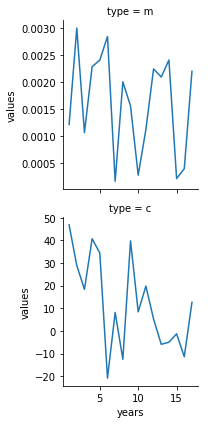

In [51]:
g = sns.FacetGrid(data=m_c_results, row='type', sharey=False)
g = g.map(sns.lineplot, "years", "values")

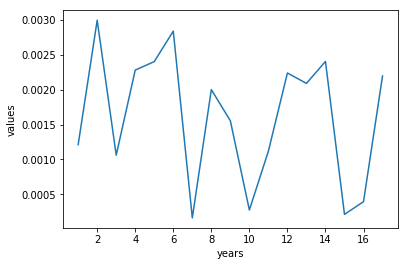

In [52]:
sns.lineplot(data=m_results, x='years', y='values')


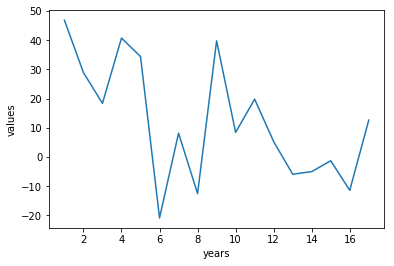

In [53]:
sns.lineplot(data=c_results, x='years', y='values')

In [54]:
ga_filtered = ga_results[ga_results.reward<1000].reset_index(drop=True)
ga_filtered

id  run_number     time_taken     timestamp_start       timestamp_end  \
0     1           1  6889.77597956 1571294676.44862819 1571301566.22460723   
1    21           1 36107.88006963 1571294675.74081588 1571330783.62088513   
2    47           1 26997.94120385 1571294676.84062243 1571321674.78182650   
3    50           1 18257.83868062 1571294676.67850208 1571312934.51718354   
4    72           1 32165.13072975 1571303275.84294128 1571335440.97367024   
5    76           1 36569.24253739 1571305081.54277730 1571341650.78531361   
6    81           1 26506.03623048 1571306287.71197701 1571332793.74820733   
7    98           1 31353.28813183 1571313147.49051094 1571344500.77864194   
8   115           1 32493.42790743 1571317957.92498422 1571350451.35291266   
9   128           2 48183.78087005 1571353096.15725231 1571401279.93812275   
10  134           2 44639.83850450 1571353094.09060907 1571397733.92911410   
11  140           2 58431.38186710 1571353095.23878646 1571411526.62065315   
12  147           2 41900.62126356 1571353094.84637976 1571394995.46764445   
13  149           2 68920.77969943 1571353106.10741663 1571422026.88711596   
14  154           2 42069.87624443 1571353093.54570293 1571395163.42194772   
15  160           2 76778.54166355 1571353101.65339637 1571429880.19505978   
16  174           2 68974.27395174 1571353100.32341266 1571422074.59736466   
17  181           2 32788.63537628 1571353103.35626864 1571385891.99164581   
18  182           2 19721.25226660 1571353099.09960938 1571372820.35187602   
19  193           2 24354.36721343 1571365305.13588238 1571389659.50309658   
20  194           2 42768.61949068 1571366327.18311119 1571409095.80260158   
21  199           2 50313.34967560 1571370822.43992066 1571421135.78959537   
22  211           2 46079.20949586 1571380665.90552759 1571426745.11502290   
23  213           2 62729.59273311 1571381766.65243912 1571444496.24517155   
24  221           2 21467.25539036 1571386756.07237959 1571408223.32777047   
25  229           2 28756.16645562 1571392261.36444569 1571421017.53090119   
26  230           2 50715.01138983 1571392518.02709913 1571443233.03848791   
27  243           2 48735.97723017 1571401257.41707420 1571449993.39430380   
28  246           2 27650.50620028 1571402174.20093417 1571429824.70713377   
29  256           3 76197.46745404 1571469272.65416431 1571545470.12161875   
30  264           3 80086.01106698 1571469268.64859629 1571549354.65966344   
31  284           3 37157.57467432 1571469272.35708308 1571506429.93175793   
32  285           3 25129.32689053 1571469262.20764446 1571494391.53453493   
33  291           3 75154.64136692 1571469266.04584765 1571544420.68721485   
34  295           3 32732.13324374 1571469269.77537870 1571502001.90862274   
35  315           3 63224.17770334 1571469264.23071241 1571532488.40841603   
36  325           3 27694.24950881 1571494414.22670794 1571522108.47621679   
37  330           3 45201.54933323 1571502039.07831430 1571547240.62764740   
38  335           3 40814.10451027 1571506468.35279226 1571547282.45730257   

        reward  individual_m_1  individual_c_1  individual_m_2  \
0  24.20282517      0.00162689     24.23676004      0.00089263   
1   7.03761227      0.00121256     46.85037739      0.00299824   
2   6.28906943      0.00156925     17.18127794      0.00268365   
3  12.99127040      0.00121256     46.85037739      0.00299824   
4  12.80646530      0.00139491      8.70184129      0.00295597   
5  10.79874527      0.00121256      7.87560154      0.00267257   
6  10.22134408      0.00137662    -28.84595497      0.00094221   
7   8.35001538      0.00121256     46.85037739      0.00299824   
8   6.38101335      0.00085104      6.07348253      0.00037382   
9  13.58929125      0.00121256     46.85037739      0.00299824   
10  7.84081887      0.00085104      6.07348253      0.00037382   
11  8.75634603      0.00156925    -20.60890319      0.00067871   
12  7.72473015      0.0003

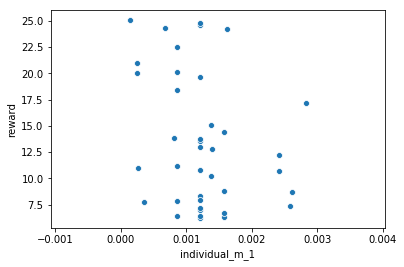

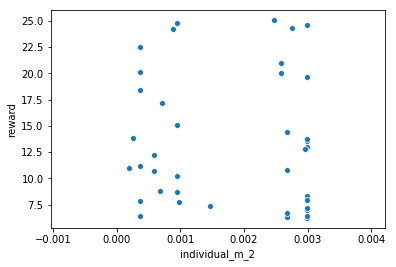

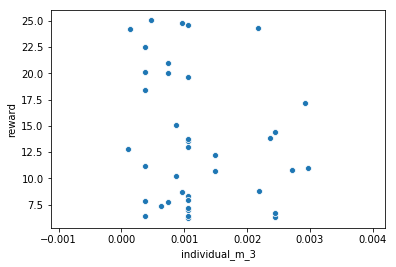

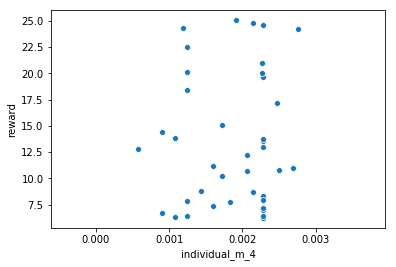

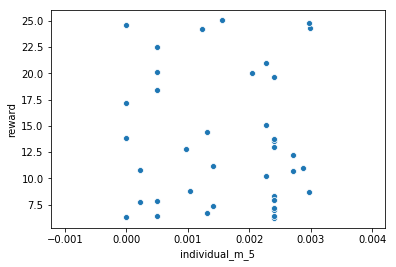

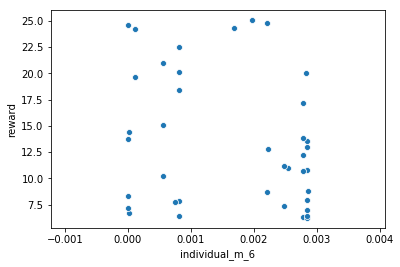

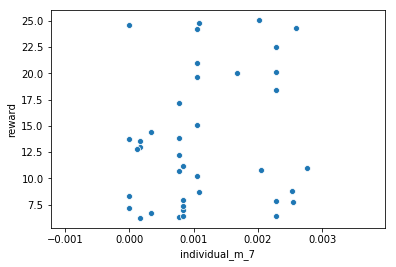

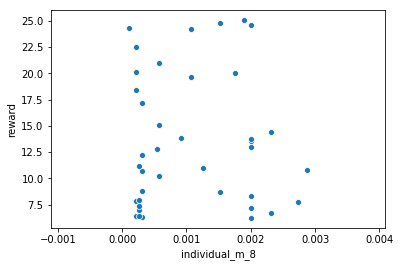

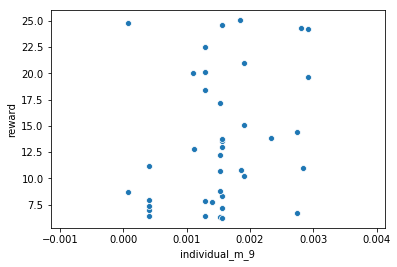

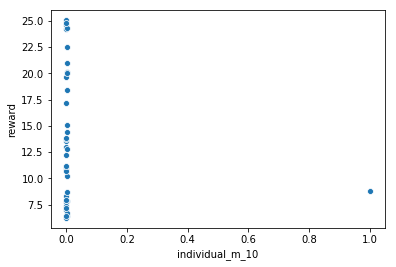

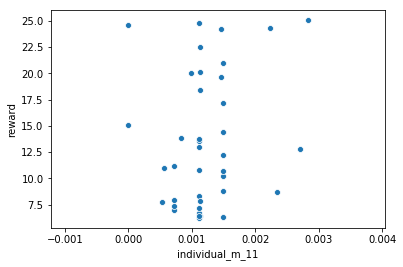

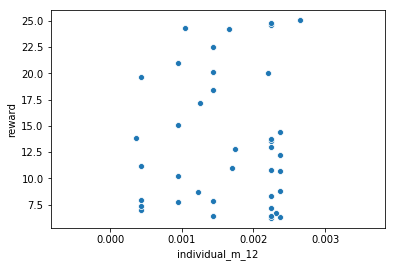

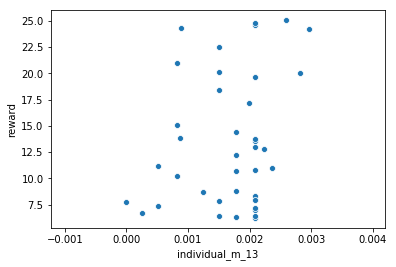

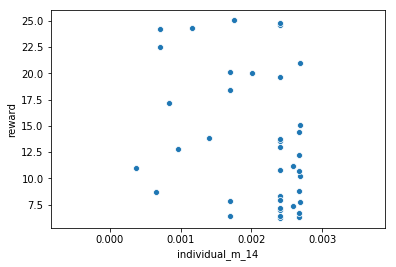

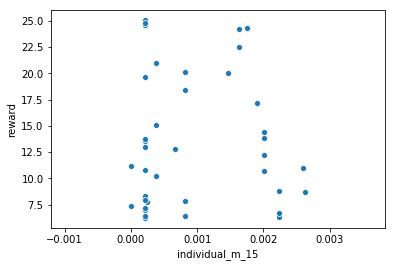

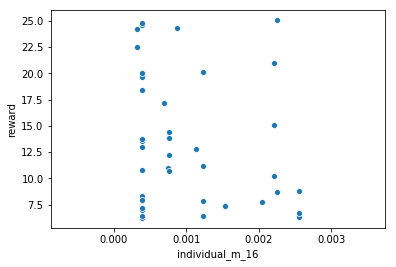

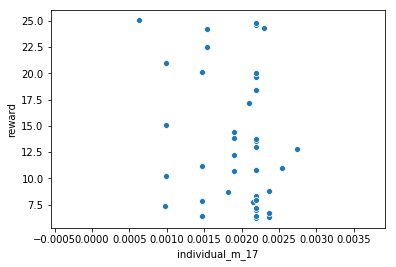

In [55]:
for i in range(17):
    sns.scatterplot(data=ga_filtered, y='reward', x='individual_m_{}'.format(i+1))
    plt.show()
    

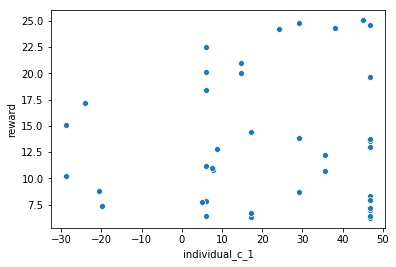

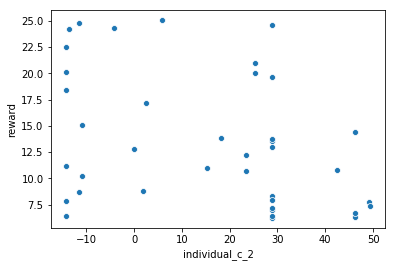

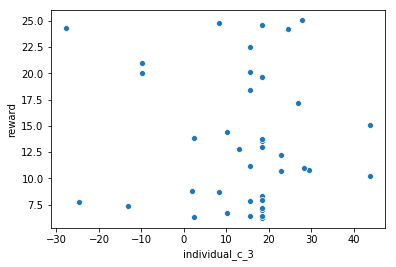

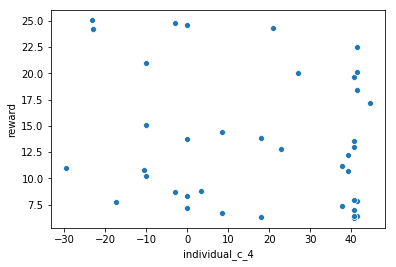

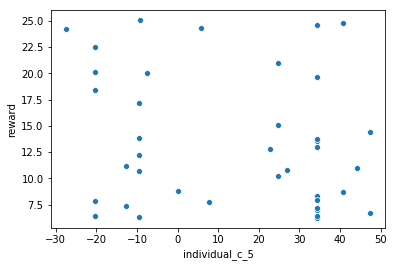

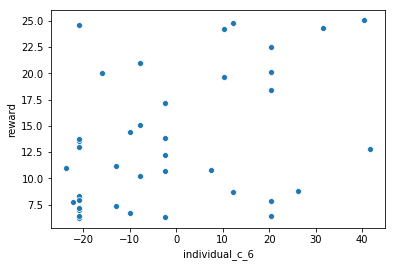

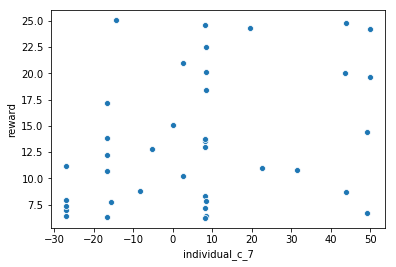

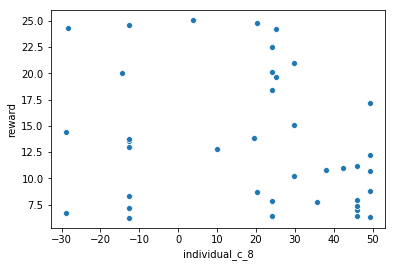

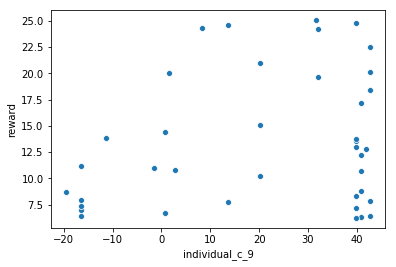

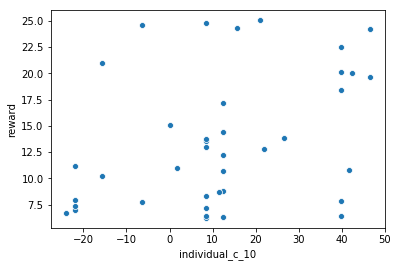

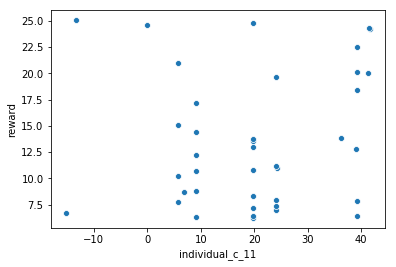

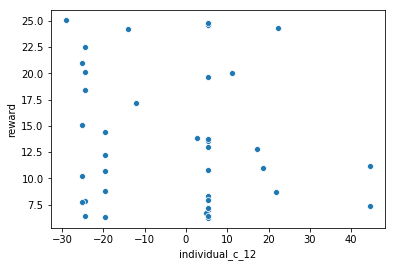

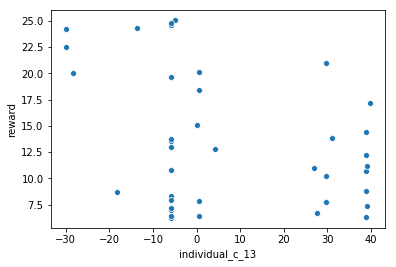

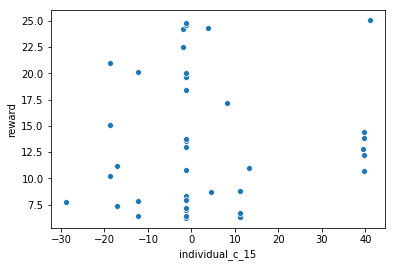

In [56]:
for i in range(17):
    sns.scatterplot(data=ga_filtered, y='reward', x='individual_c_{}'.format(i+1))
    plt.show()

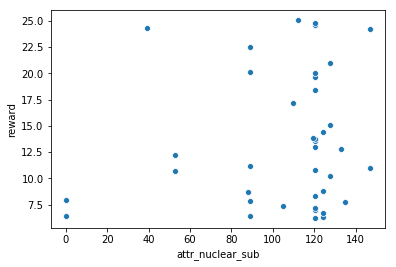

In [57]:
sns.scatterplot(data=ga_filtered, y='reward', x='attr_nuclear_sub')

In [58]:
ga_filtered_reduced = ga_filtered.drop(['time_taken','timestamp_start', 'timestamp_end','coal','nuclear','ccgt','wind','solar','run_number'], axis=1)
ga_filtered_reduced.iloc[:,2:]

individual_m_1  individual_c_1  individual_m_2  individual_c_2  \
0       0.00162689     24.23676004      0.00089263    -13.49865601   
1       0.00121256     46.85037739      0.00299824     28.92297656   
2       0.00156925     17.18127794      0.00268365     46.19691357   
3       0.00121256     46.85037739      0.00299824     28.92297656   
4       0.00139491      8.70184129      0.00295597      0.03669237   
5       0.00121256      7.87560154      0.00267257     42.46118426   
6       0.00137662    -28.84595497      0.00094221    -10.91223923   
7       0.00121256     46.85037739      0.00299824     28.92297656   
8       0.00085104      6.07348253      0.00037382    -14.26871925   
9       0.00121256     46.85037739      0.00299824     28.92297656   
10      0.00085104      6.07348253      0.00037382    -14.26871925   
11      0.00156925    -20.60890319      0.00067871      1.86199474   
12      0.00035892      5.12278906      0.00097638     49.09170336   
13      0.00121256     46.85037739      0.00299824     28.92297656   
14      0.00261015     29.22065745      0.00094500    -11.42581612   
15      0.00085104      6.07348253      0.00037382    -14.26871925   
16      0.00156925     17.18127794      0.00268365     46.19691357   
17      0.00085104      6.07348253      0.00037382    -14.26871925   
18      0.00024971     14.80722557      0.00258930     25.24740339   
19      0.00085104      6.07348253      0.00037382    -14.26871925   
20      0.00121256     46.85037739      0.00299824     28.92297656   
21      0.00121256     46.85037739      0.00299824     28.92297656   
22      0.00081062     29.12788878      0.00024943     18.17532677   
23      0.00026202      7.42021178      0.00018659     15.23512863   
24      0.00258794    -19.83189434      0.00146116     49.38866648   
25      0.00024971     14.80722557      0.00258930     25.24740339   
26      0.00121256     46.85037739      0.00299824     28.92297656   
27      0.00282070    -24.11486682      0.00070847      2.50730389   
28      0.00241538     35.73631021      0.00058835     23.49895689   
29      0.00121256     46.85037739      0.00299824     28.92297656   
30      0.00121256     46.85037739      0.00299824     28.92297656   
31      0.00014448     45.02538073      0.00247698      5.94622858   
32      0.00121256     46.85037739      0.00299824     28.92297656   
33      0.00137662    -28.84595497      0.00094221    -10.91223923   
34      0.00241538     35.73631021      0.00058835     23.49895689   
35      0.00085104      6.07348253      0.00037382    -14.26871925   
36      0.00066969     38.04372962      0.00275498     -4.08469209   
37      0.00121256     29.22065745      0.00094500    -11.42581612   
38      0.00156925     17.18127794      0.00268365     46.19691357   

    individual_m_3  individual_c_3  individual_m_4  individual_c_4  \
0       0.00013463     24.48416356      0.00275760    -22.86750991   
1       0.00106156     18.37033767      0.00228313     40.74731544   
2       0.00245010      2.44276478      0.00108142     17.97087764   
3       0.00106156     18.37033767      0.00228313     40.74731544   
4       0.00009951     12.93793188      0.00057393     22.97488560   
5       0.00271065     29.38272405      0.00250506    -10.39552908   
6       0.00086952     43.80398940      0.00172266     -9.97208871   
7       0.00106156     18.37033767      0.00228313      0.00000000   
8       0.00037344     15.48800404      0.00124241     41.42988018   
9       0.00106156     18.37033767      0.00228313     40.74731544   
10      0.00037344     15.48800404      0.00124241     41.42988018   
11      0.00218696      1.94845683      0.00143239      3.28120137   
12      0.00073898    -24.63395619      0.00183544    -17.41598655   
13      0.00106156     18.37033767      0.00228313     40.74731544   
14      0.00096621      8.26965272      0.00214860     -2.91073123   
15      0.00037344     15.48800404      0.00124241     41.42988018   
16      0.002

In [59]:
result_pca = PCA(n_components = 4).fit_transform(ga_filtered_reduced.iloc[:,2:])
result_pca
pca_result = pd.DataFrame({'pca_1':pd.Series(result_pca[:, 0].flatten()), 'pca_2':pd.Series(result_pca[:, 1].flatten()),'pca_3':pd.Series(result_pca[:, 2].flatten()), 'reward':ga_filtered_reduced.reward})
sns.regplot(data=pca_result, x='pca_1', y='reward')

In [60]:
sns.regplot(data=pca_result, x='pca_2', y='reward')

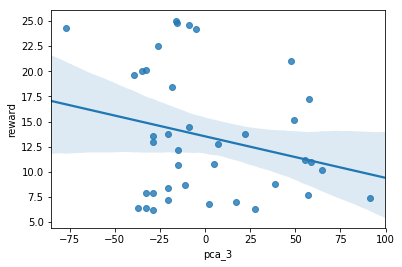

In [61]:
sns.regplot(data=pca_result, x='pca_3', y='reward')

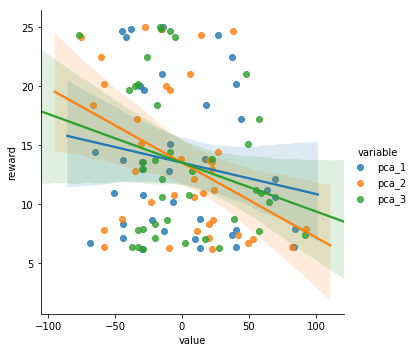

In [62]:
pca_result_long = pca_result.melt("reward")
sns.lmplot(data=pca_result_long, x='value', y='reward', hue='variable')

In [117]:
ga_results_small_reward = ga_results[ga_results.reward < 1000]
ga_results_small_reward

id  run_number     time_taken     timestamp_start       timestamp_end  \
0      1           1  6889.77597956 1571294676.44862819 1571301566.22460723   
20    21           1 36107.88006963 1571294675.74081588 1571330783.62088513   
46    47           1 26997.94120385 1571294676.84062243 1571321674.78182650   
49    50           1 18257.83868062 1571294676.67850208 1571312934.51718354   
71    72           1 32165.13072975 1571303275.84294128 1571335440.97367024   
75    76           1 36569.24253739 1571305081.54277730 1571341650.78531361   
80    81           1 26506.03623048 1571306287.71197701 1571332793.74820733   
97    98           1 31353.28813183 1571313147.49051094 1571344500.77864194   
114  115           1 32493.42790743 1571317957.92498422 1571350451.35291266   
127  128           2 48183.78087005 1571353096.15725231 1571401279.93812275   
133  134           2 44639.83850450 1571353094.09060907 1571397733.92911410   
139  140           2 58431.38186710 1571353095.23878646 1571411526.62065315   
146  147           2 41900.62126356 1571353094.84637976 1571394995.46764445   
148  149           2 68920.77969943 1571353106.10741663 1571422026.88711596   
153  154           2 42069.87624443 1571353093.54570293 1571395163.42194772   
159  160           2 76778.54166355 1571353101.65339637 1571429880.19505978   
173  174           2 68974.27395174 1571353100.32341266 1571422074.59736466   
180  181           2 32788.63537628 1571353103.35626864 1571385891.99164581   
181  182           2 19721.25226660 1571353099.09960938 1571372820.35187602   
192  193           2 24354.36721343 1571365305.13588238 1571389659.50309658   
193  194           2 42768.61949068 1571366327.18311119 1571409095.80260158   
198  199           2 50313.34967560 1571370822.43992066 1571421135.78959537   
210  211           2 46079.20949586 1571380665.90552759 1571426745.11502290   
212  213           2 62729.59273311 1571381766.65243912 1571444496.24517155   
220  221           2 21467.25539036 1571386756.07237959 1571408223.32777047   
228  229           2 28756.16645562 1571392261.36444569 1571421017.53090119   
229  230           2 50715.01138983 1571392518.02709913 1571443233.03848791   
242  243           2 48735.97723017 1571401257.41707420 1571449993.39430380   
245  246           2 27650.50620028 1571402174.20093417 1571429824.70713377   
255  256           3 76197.46745404 1571469272.65416431 1571545470.12161875   
263  264           3 80086.01106698 1571469268.64859629 1571549354.65966344   
283  284           3 37157.57467432 1571469272.35708308 1571506429.93175793   
284  285           3 25129.32689053 1571469262.20764446 1571494391.53453493   
290  291           3 75154.64136692 1571469266.04584765 1571544420.68721485   
294  295           3 32732.13324374 1571469269.77537870 1571502001.90862274   
314  315           3 63224.17770334 1571469264.23071241 1571532488.40841603   
324  325           3 27694.24950881 1571494414.22670794 1571522108.47621679   
329  330           3 45201.54933323 1571502039.07831430 1571547240.62764740   
334  335           3 40814.10451027 1571506468.35279226 1571547282.45730257   

         reward  individual_m_1  individual_c_1  individual_m_2  \
0   24.20282517      0.00162689     24.23676004      0.00089263   
20   7.03761227      0.00121256     46.85037739      0.00299824   
46   6.28906943      0.00156925     17.18127794      0.00268365   
49  12.99127040      0.00121256     46.85037739      0.00299824   
71  12.80646530      0.00139491      8.70184129      0.00295597   
75  10.79874527      0.00121256      7.87560154      0.00267257   
80  10.22134408      0.00137662    -28.84595497      0.00094221   
97   8.35001538      0.00121256     46.85037739      0.00299824   
114  6.38101335      0.00085104      6.07348253      0.00037382   
127 13.58929125      0.00121256     46.85037739      0.00299824   
133  7.84081887      0.00085104      6.07348253      0.00037382   
139  8.75634603      0.00156925    -20.60

In [118]:
ga_results_small_reward = ga_results_small_reward.drop(['time_taken','timestamp_start','timestamp_end','coal','nuclear','ccgt','wind','solar'], axis=1)
ga_results_small_reward

id  run_number      reward  individual_m_1  individual_c_1  \
0      1           1 24.20282517      0.00162689     24.23676004   
20    21           1  7.03761227      0.00121256     46.85037739   
46    47           1  6.28906943      0.00156925     17.18127794   
49    50           1 12.99127040      0.00121256     46.85037739   
71    72           1 12.80646530      0.00139491      8.70184129   
75    76           1 10.79874527      0.00121256      7.87560154   
80    81           1 10.22134408      0.00137662    -28.84595497   
97    98           1  8.35001538      0.00121256     46.85037739   
114  115           1  6.38101335      0.00085104      6.07348253   
127  128           2 13.58929125      0.00121256     46.85037739   
133  134           2  7.84081887      0.00085104      6.07348253   
139  140           2  8.75634603      0.00156925    -20.60890319   
146  147           2  7.72473015      0.00035892      5.12278906   
148  149           2 19.67895373      0.00121256     46.85037739   
153  154           2  8.68381072      0.00261015     29.22065745   
159  160           2 20.15136254      0.00085104      6.07348253   
173  174           2  6.75200441      0.00156925     17.18127794   
180  181           2 18.42350326      0.00085104      6.07348253   
181  182           2 20.03643241      0.00024971     14.80722557   
192  193           2 22.47219984      0.00085104      6.07348253   
193  194           2  7.92200521      0.00121256     46.85037739   
198  199           2 13.71900690      0.00121256     46.85037739   
210  211           2 13.80548994      0.00081062     29.12788878   
212  213           2 11.00178952      0.00026202      7.42021178   
220  221           2  7.38367191      0.00258794    -19.83189434   
228  229           2 21.01808709      0.00024971     14.80722557   
229  230           2  6.22960724      0.00121256     46.85037739   
242  243           2 17.19855189      0.00282070    -24.11486682   
245  246           2 12.18438028      0.00241538     35.73631021   
255  256           3  7.17456227      0.00121256     46.85037739   
263  264           3  6.41350116      0.00121256     46.85037739   
283  284           3 25.05152742      0.00014448     45.02538073   
284  285           3 24.64420092      0.00121256     46.85037739   
290  291           3 15.12578970      0.00137662    -28.84595497   
294  295           3 10.66071529      0.00241538     35.73631021   
314  315           3 11.20981857      0.00085104      6.07348253   
324  325           3 24.35120502      0.00066969     38.04372962   
329  330           3 24.82617033      0.00121256     29.22065745   
334  335           3 14.46194377      0.00156925     17.18127794   

     individual_m_2  individual_c_2  individual_m_3  individual_c_3  \
0        0.00089263    -13.49865601      0.00013463     24.48416356   
20       0.00299824     28.92297656      0.00106156     18.37033767   
46       0.00268365     46.19691357      0.00245010      2.44276478   
49       0.00299824     28.92297656      0.00106156     18.37033767   
71       0.00295597      0.03669237      0.00009951     12.93793188   
75       0.00267257     42.46118426      0.00271065     29.38272405   
80       0.00094221    -10.91223923      0.00086952     43.80398940   
97       0.00299824     28.92297656      0.00106156     18.37033767   
114      0.00037382    -14.26871925      0.00037344     15.48800404   
127      0.00299824     28.92297656      0.00106156     18.37033767   
133      0.00037382    -14.26871925      0.00037344     15.48800404   
139      0.00067871      1.86199474      0.00218696      1.94845683   
146      0.00097638     49.09170336      0.00073898    -24.63395619   
148      0.00299824     28.92297656      0.00106156     18.37033767   
153      0.00094500    -11.42581612      0.00096621      8.26965272   
159      0.00037382    -14.26871925      0.00037344     15.48800404   
173      0.00268365     46.19691357      0.00245010     10.07673785   
180    

In [119]:
ga_results_small_long = ga_results_small_reward.melt(['id', "reward"])
results_individual = ga_results_small_long[ga_results_small_long.variable.str.contains("individual_")]
results_individual[['ind', 'type', 'year']] = pd.DataFrame(results_individual.variable.str.split("_").values.tolist(), index = results_individual.index)


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [120]:
results_individual_small = results_individual.drop('variable', axis=1)
results_individual_small['year'] = pd.to_numeric(results_individual_small['year'])

In [121]:
g = sns.FacetGrid(results_individual_small[results_individual_small.reward < 7], col='type', palette="Set1", sharey=False)
g = (g.map(sns.lineplot, "year", 'value'))

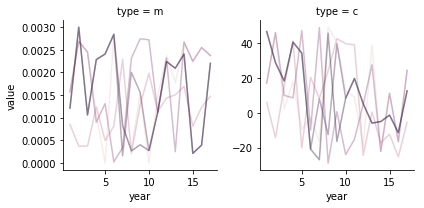

In [122]:
g = sns.FacetGrid(results_individual_small[results_individual_small.reward < 7], col='type', palette="Set1", sharey=False)
g = (g.map(sns.lineplot, "year", 'value', 'id', alpha=0.4))

In [123]:
results_individual_small

id      reward        value         ind type  year
39      1 24.20282517   0.00162689  individual    m     1
40     21  7.03761227   0.00121256  individual    m     1
41     47  6.28906943   0.00156925  individual    m     1
42     50 12.99127040   0.00121256  individual    m     1
43     72 12.80646530   0.00139491  individual    m     1
44     76 10.79874527   0.00121256  individual    m     1
45     81 10.22134408   0.00137662  individual    m     1
46     98  8.35001538   0.00121256  individual    m     1
47    115  6.38101335   0.00085104  individual    m     1
48    128 13.58929125   0.00121256  individual    m     1
49    134  7.84081887   0.00085104  individual    m     1
50    140  8.75634603   0.00156925  individual    m     1
51    147  7.72473015   0.00035892  individual    m     1
52    149 19.67895373   0.00121256  individual    m     1
53    154  8.68381072   0.00261015  individual    m     1
54    160 20.15136254   0.00085104  individual    m     1
55    174  6.75200441   0.00156925  individual    m     1
56    181 18.42350326   0.00085104  individual    m     1
57    182 20.03643241   0.00024971  individual    m     1
58    193 22.47219984   0.00085104  individual    m     1
59    194  7.92200521   0.00121256  individual    m     1
60    199 13.71900690   0.00121256  individual    m     1
61    211 13.80548994   0.00081062  individual    m     1
62    213 11.00178952   0.00026202  individual    m     1
63    221  7.38367191   0.00258794  individual    m     1
64    229 21.01808709   0.00024971  individual    m     1
65    230  6.22960724   0.00121256  individual    m     1
66    243 17.19855189   0.00282070  individual    m     1
67    246 12.18438028   0.00241538  individual    m     1
68    256  7.17456227   0.00121256  individual    m     1
69    264  6.41350116   0.00121256  individual    m     1
70    284 25.05152742   0.00014448  individual    m     1
71    285 24.64420092   0.00121256  individual    m     1
72    291 15.12578970   0.00137662  individual    m     1
73    295 10.66071529   0.00241538  individual    m     1
74    315 11.20981857   0.00085104  individual    m     1
75    325 24.35120502   0.00066969  individual    m     1
76    330 24.82617033   0.00121256  individual    m     1
77    335 14.46194377   0.00156925  individual    m     1
78      1 24.20282517  24.23676004  individual    c     1
79     21  7.03761227  46.85037739  individual    c     1
80     47  6.28906943  17.18127794  individual    c     1
81     50 12.99127040  46.85037739  individual    c     1
82     72 12.80646530   8.70184129  individual    c     1
83     76 10.79874527   7.87560154  individual    c     1
84     81 10.22134408 -28.84595497  individual    c     1
85     98  8.35001538  46.85037739  individual    c     1
86    115  6.38101335   6.07348253  individual    c     1
87    128 13.58929125  46.85037739  individual    c     1
88    134  7.84081887   6.07348253  individual    c     1
89    140  8.75634603 -20.60890319  individual    c     1
90    147  7.72473015   5.12278906  individual    c     1
91    149 19.67895373  46.85037739  individual    c     1
92    154  8.68381072  29.22065745  individual    c     1
93    160 20.15136254   6.07348253  individual    c     1
94    174  6.75200441  17.18127794  individual    c     1
95    181 18.42350326   6.07348253  individual    c     1
96    182 20.03643241  14.80722557  individual    c     1
97    193 22.47219984   6.07348253  individual    c     1
98    194  7.92200521  46.85037739  individual    c     1
99    199 13.71900690  46.85037739  individual    c     1
100   211 13.80548994  29.12788878  individual    c     1
101   213 11.00178952   7.42021178  individual    c     1
102   221  7.38367191 -19.83189434  individual    c     1
103   229 21.01808709  14.80722557  individual    c     1
104   230  6.22960724  46.85037739  individual    c     1
105   243 17.19855189 -24.11486682  individual    c     1
106   246 12.18438028  35.73631021  individual    c     1
107  

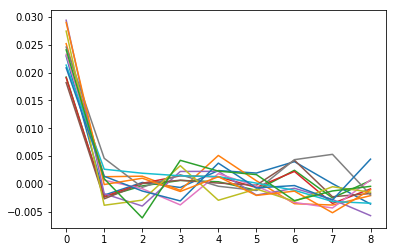

In [124]:
results_for_fft = results_individual_small[results_individual_small.reward > 15]
for i in np.unique(results_for_fft.id):
    fft_result = np.fft.rfft(results_for_fft[((results_for_fft.id==i) & (results_for_fft.type=='m'))].value)
    fft_max = max(fft_result)
    if fft_max <0.5:
        plt.plot(np.fft.rfft(results_for_fft[((results_for_fft.id==i) & (results_for_fft.type=='m'))].value))
#     plt.show()

In [80]:
for i in np.unique(results_individual_small.id):
    plt.plot(np.fft.rfft(results_individual_small[((results_individual_small.id==i) & (results_individual_small.type=='c'))].value))
